# Problem 2: Finding Birds

Counting the number of birds in an image.


In [1]:
# imports
import cv2
import os
import matplotlib.pyplot as plt

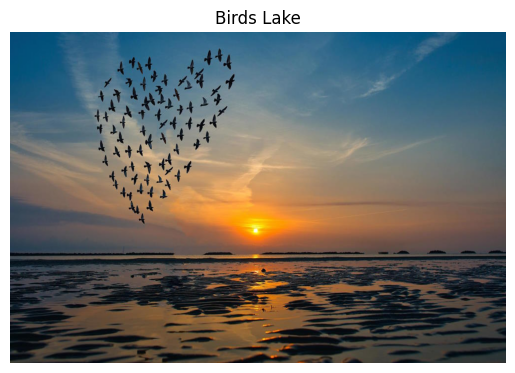

In [2]:
# open the image
bird_image_path = os.path.join('imgs', 'birds_lake.jpg')
bird_image = cv2.imread(bird_image_path)

# display the image (using matplotlib here cause was having issues with the cv3 imshow on macos)
bird_image_rgb = cv2.cvtColor(bird_image, cv2.COLOR_BGR2RGB)
plt.imshow(bird_image_rgb)
plt.title('Birds Lake')
plt.axis('off')
plt.show()


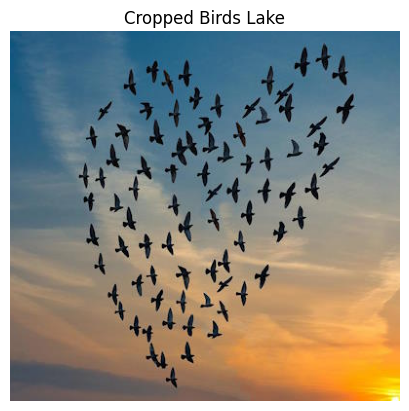

In [3]:
# crop the image to focus on the bird area:
y1_crop, y2_crop, x1_crop, x2_crop = 20, 400, 100, 500
cropped_image = bird_image[y1_crop:y2_crop, x1_crop:x2_crop]
clean_copy = cropped_image.copy()

# display the cropped image
cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_image_rgb)
plt.title('Cropped Birds Lake')
plt.axis('off')
plt.show()

Number of contours: 80


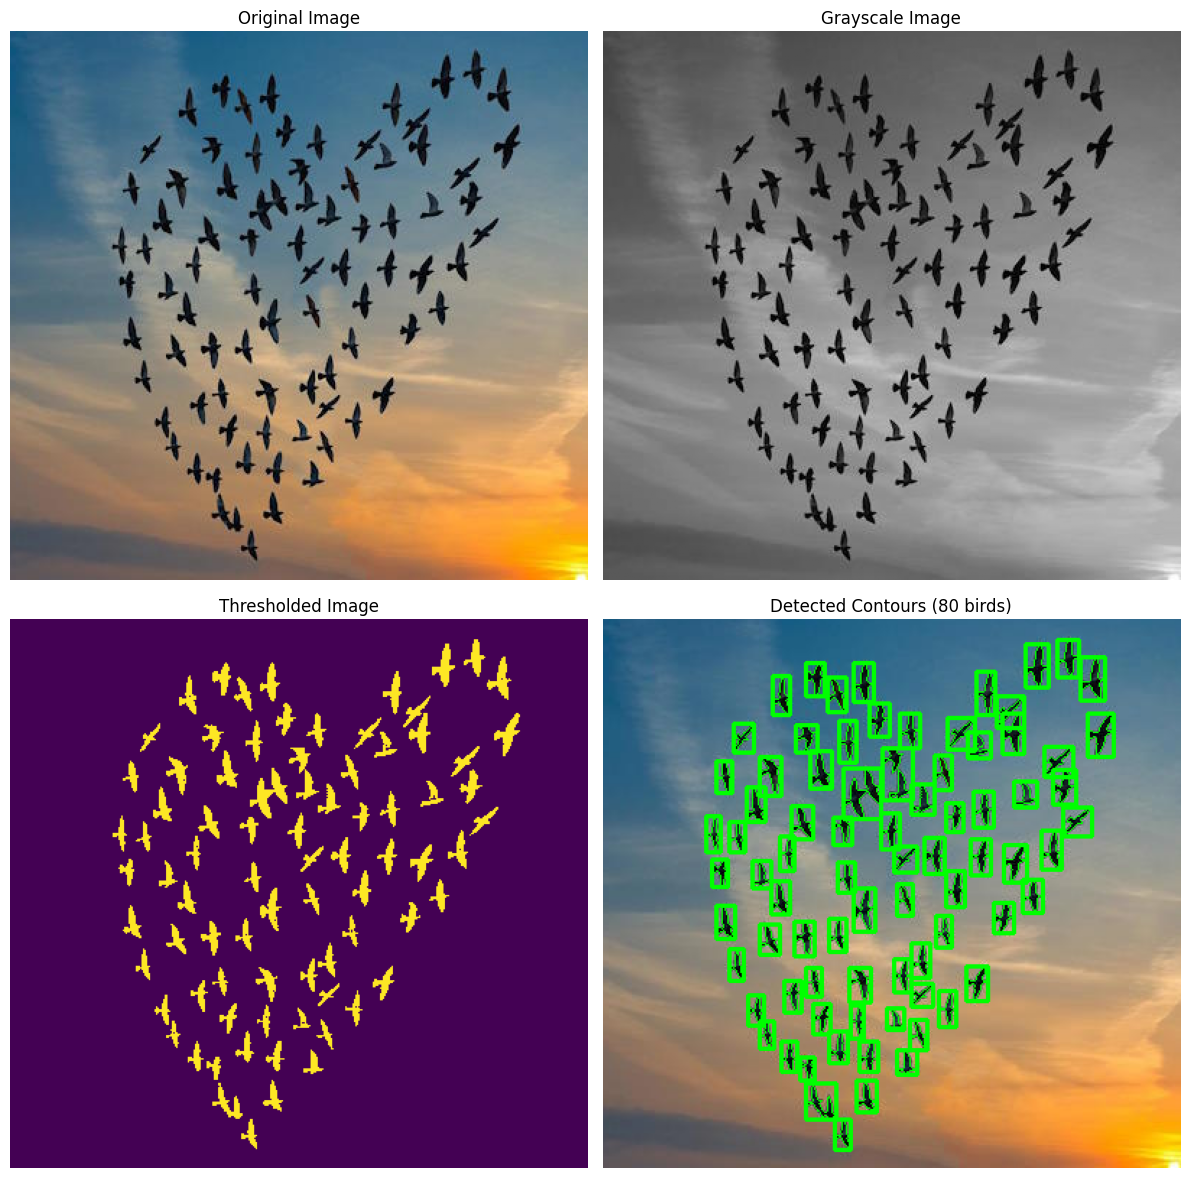

In [ ]:
img_gray = cv2.cvtColor(clean_copy, cv2.COLOR_BGR2GRAY)

# birds are dark spots on a light background. Apply inverse thresholding.
ret, thresh = cv2.threshold(img_gray, 65, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_num = 0

# Draw on a copy so we don't corrupt cropped_image.
contours_image = clean_copy.copy()
full_image_with_boxes = bird_image.copy()

# Set your minimum and maximum area bounds
min_area = 15
max_area = 300

for cnt in contours:
    area = cv2.contourArea(cnt)
    
    # Check if the area is strictly between the min and max thresholds
    if min_area < area < max_area: 
        cv2.drawContours(contours_image, [cnt], -1, (0, 255, 0), 1)
        

        x1, y1, width, height = cv2.boundingRect(cnt)
        cv2.rectangle(contours_image, (x1, y1), (x1 + width, y1 + height), (0, 255, 0), 2)
        

        x1_full, y1_full = x1 + x1_crop, y1 + y1_crop
        cv2.rectangle(full_image_with_boxes, (x1_full, y1_full), 
                      (x1_full + width, y1_full + height), (0, 255, 0), 2)
        
        contours_num += 1

print(f"Number of contours: {contours_num}")

rgb_image = cv2.cvtColor(clean_copy, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].imshow(rgb_image)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_gray, cmap='gray')
axs[0, 1].set_title('Grayscale Image')
axs[0, 1].axis('off')

axs[1, 0].imshow(thresh)
axs[1, 0].set_title('Thresholded Image')
axs[1, 0].axis('off')

contours_rgb = cv2.cvtColor(contours_image, cv2.COLOR_BGR2RGB)
axs[1, 1].imshow(contours_rgb)
axs[1, 1].set_title(f'Detected Contours ({contours_num} birds)')
axs[1, 1].axis('off')

# tight layout
plt.tight_layout()

In [ ]:
cv2.imwrite(os.path.join('output', 'detected_birds_cropped.jpg'), contours_image)
cv2.imwrite(os.path.join('output', 'detected_birds_full.jpg'), full_image_with_boxes)

True